# Graph Theory Design for Optimal East Lansing Travel Route
## Social 5 Group Project
#### Aaron Langtry, Benjamin Mellon, Frank Luginbill, Jessica Parks, Joshua Pepper, Rishika Juloori

## 1 Background and Motivation

With over 5,200 acres, Michigan State University is the 8th largest college campus in the United States. This campus is home to 563 buildings and has several miles of roads and sidewalks, so navigating between classes and landmarks can be very challenging. To help students, faculty, and visitors better navigate MSU's campus and the surrounding East Lansing area, our group seeks to calculate the shortest route between two chosen points of interest using various methods of transportation. The transportation types include walking and driving, and routes can be optimized for the least time traveled or the shortest distance covered. These conditions can be changed based on user preference and represent the primary variables of real-life transportation.  



To determine the most efficient route based on various inputs, our group utilized OSMnx, Networkx, and Geopy to make a function that satisfies the travel conditions of the user. By developing functions that streamline the user-interface experience and accurately visualize spatial relationships on a 2-D plane, the user can quickly obtain reliable navigation information. The primary deliverable of this project is a function that displays a navigation map based on a starting location, ending location, a method of travel, and a distance or time minimizer. This function is derived from user-interface development and effective user-friendly visualization packages in Python. The functions can be applied for studying broader networks and has implementation potential for mobile apps and websites. In our study, the deliverables can be used to analyze human-spatial interactions in East Lansing, but broader analysis and conclusions can be formed from these visualizations. 

## 2 Methodology

In creating a pseudo interface for navigation at MSU and the surrounding area, we will rely heavily on graph theory. Specifically, we will make use of osmnx, folium, and networkx. Geopy will also be necessary for allowing users to specify locations.

### Attention: Please uncomment the cell directly below and then run the cells underneath.

In [13]:
# installs
# !pip install osmnx
# !pip install geopy
# ! pip install networkx
# ! pip install folium

In [14]:
# imports
import osmnx as ox
import folium
import networkx as nx
from geopy.geocoders import Nominatim

### Stop!

The function below utilizes geopy to return coordinates given a location name.

### Run the cell below.

In [4]:
def getCoordinates(location):
    '''
    This function gets the coordinates of a place from an inputted string name, and from that string name returns address, coordinates, and getLoc
    
    inputs:
        Location: A string that represents a place in or near MSU campus
        
    Returns:
        Adress: The name of the location
        Coordinates: The longitude and latitude of the location
        getLoc: Determines if the entered location is in East Lansing
    '''
    loc = Nominatim(user_agent="GetLoc")

    # appending city and state to location name
    location = location + ", East Lansing, MI"
    getLoc = loc.geocode(location)
        # checking location exists, if not function returns None for all values
    if getLoc is None:
        return None, None, None
    else:
        # storing address name
        address = getLoc.address

        # storing lattitude and longitude
        coordinates = (getLoc.latitude, getLoc.longitude)

        return address, coordinates, getLoc

### Stop!

The cell below uses osmnx to generate a graph for MSU campus and the surrounding area. The following cells displays the node data and edge data for the graphs.

### Run the cells below.

In [5]:
# initializing graph object
place = (42.72184876143654, -84.48878571939379)
G = ox.graph_from_point(place, dist=1500, network_type='drive')

In [10]:
graph_dataframes = ox.graph_to_gdfs(G, nodes=True, edges=True)
print("Nodes")
display(graph_dataframes[0].head()) #displays the information for the first 5 nodes
print("Edges")
display(graph_dataframes[1].head()) #displays the information for the first 5 edges

Nodes


,y,x,street_count,highway,ref,geometry
osmid,,,,,,
184487794,42.733600,-84.500390,3,NaN,NaN,POINT (-84.50039 42.73360)
184494621,42.719906,-84.499945,4,NaN,NaN,POINT (-84.49995 42.71991)
184494629,42.720184,-84.502318,3,motorway_junction,NaN,POINT (-84.50232 42.72018)
184494646,42.720262,-84.502886,3,motorway_junction,NaN,POINT (-84.50289 42.72026)
184508494,42.733594,-84.502953,3,bus_stop,NaN,POINT (-84.50295 42.73359)


Edges


osmid  oneway    ref             name  \
u         v          key                                              
184487794 1496019655 0    317024753    True  M 143  Michigan Avenue   
184494621 184494629  0     17806460    True    NaN              NaN   
          184591040  0     17823087   False    NaN      Arbor Drive   
          184639765  0    996327484    True    NaN      Arbor Drive   
184494629 184494646  0     17806460    True    NaN              NaN   

                                highway maxspeed   length  \
u         v          key                                    
184487794 1496019655 0        secondary   35 mph  104.301   
184494621 184494629  0    motorway_link      NaN  196.455   
          184591040  0      residential      NaN  105.350   
          184639765  0      residential      NaN   15.169   
184494629 184494646  0    motorway_link      NaN   47.243   

                                                                   geometry  \
u         v          key                                                      
184487794 1496019655 0    LINESTRING (-84.50039 42.73360, -84.50098 42.7...   
184494621 184494629  0    LINESTRING (-84.49995 42.71991, -84.50073 42.7...   
          184591040  0    LINESTRING (-84.49995 42.71991, -84.49995 42.7...   
          184639765  0    LINESTRING (-84.49995 42.71991, -84.49991 42.7...   
184494629 184494646  0    LINESTRING (-84.50232 42.72018, -84.50289 42.7...   

                         lanes bridge access  
u         v          key                      
184487794 1496019655 0     NaN    NaN    NaN  
184494621 184494629  0       2    NaN    NaN  
          184591040  0     NaN    NaN    NaN  
          184639765  0     NaN    NaN    NaN  
184494629 184494646  0       2    NaN    NaN

As we can see, osmnx graphs store a lot of information. We want to pay attention to the connections and their lengths and maxspeeds. The x and y coordinates of the nodes are also necessary for our getCoordinates function.

### Stop!

Netowrkx is not the only package capable of finding the shortest route, but unlike other packages, it allows the user to specify what the weight for the path should be. For now, we will find the path with the shortest distance, but later we will tell Networkx to find the shortest drive time (or walking time). The cells below contain an example plot using two types of plots: osmnx and folium.

### Run the cells below.

In [26]:
start = (42.7240569042893, -84.470615171598) #Arbitrary East Lansing starting location
end =(42.72507741134227, -84.48132919519877) #Arbitrary East Lansing ending location

orig_node = ox.nearest_nodes(G, start[1], start[0])   #inputting the starting node into OSMnx
target_node = ox.nearest_nodes(G, end[1], end[0])   #inputting the ending node into OSMnx

route = nx.shortest_path(G,
                         orig_node,
                         target_node, weight='distance')    #get shortest route

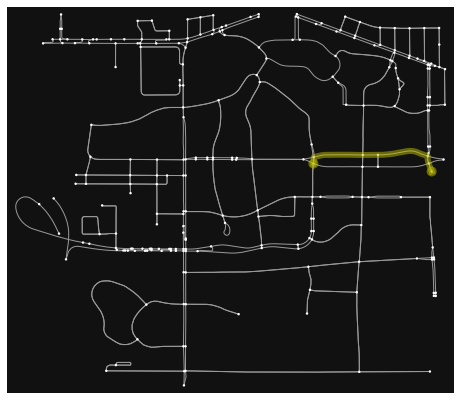

In [27]:
fig, ax = ox.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=6)

In [28]:
display(ox.plot_route_folium(G, route))

Of the two plotting methods, folium is clearly more user friendly with its inclusion of road names and ability to zoom in. 

### Stop!

Before putting everything together, we need an interface for the user. The function below asks the user for their planned route, method of travel, and whether they would like to minimize time or distance.

### Run the cell below.

In [31]:
def user_interface():
    '''
    User interface function
    inputs: 
        start_loc: The starting location as a string
        end_loc: The ending location as a string
        method: Method of travel as a string. Takes 'drive' or 'walk'
        strategy: Strategy for selection the route. Takes 'distance' or 'time'
        
    outputs:
        start_coordinates: The starting coordinates as a tuple
        end_coordinates: The ending coordinates as a tuple
        method: Method of travel as a string
        strategy: Minimization strategy as a string
    
    '''
    loc = Nominatim(user_agent="GetLoc")  # calls an application that contains locations by their names
    
    # creates lists that are used to repeated ask for inputs until valid inputs are given
    start_fix_inputs = [0]   
    end_fix_inputs = [0]
    method_fix_inputs = [0]
    strategy_fix_inputs = [0]
    
    # asks for the starting location 
    for val in start_fix_inputs: 
        start_loc = input('Starting Location: ')
        start_address, start_coordinates, getLoc_start = getCoordinates(start_loc) # gets starting coordinates
        if getLoc_start is None:
            print("Error! Please enter a valid starting location.")
            start_fix_inputs.append(0)
            
   # asks for the ending location
    for val in end_fix_inputs:
        end_loc = input('Ending Location:')
        end_address, end_coordinates, getLoc_end = getCoordinates(end_loc)  # gets ending coordinates
        if getLoc_end is None:
            print("Error! Please enter a valid ending location.")
            end_fix_inputs.append(0)
    
    # asks for method of travel
    for val in method_fix_inputs:
        method = input("Method of travel (drive,walk): ")  
        if method != "drive" and method != "walk":
            print("Error! Please enter a valid method of travel")
            method_fix_inputs.append(0)
            
    # asks for minimization strategy
    for val in strategy_fix_inputs:
        strategy = input("What do you want to minimize? (time,distance): ")
        if strategy != "time" and strategy != "distance":
            print("Error! Please enter a valid minimization strategy")
            strategy_fix_inputs.append(0)
    return start_coordinates, end_coordinates, method, strategy

### Stop!

## 3 Results

Now that all of the groundwork has been layed, all that is left is to put everything together. The function find_route prompts the user for inputs and creates a graph accordingly. The function also outputs expected time and distance.

### Run the cell below.

In [32]:
def find_route():
    '''
    Finds and plots the shortest route from the starting to ending location in a follium map
    
    inputs:
        start_loc: The starting location as a string
        end_loc: The ending location as a string
        method: Method of travel as a string. Takes 'drive' or 'walk'
        strategy: Strategy for selection the route. Takes 'distance' or 'time'
    
    outputs:
        returns a follium graph that contains the shortest route
    '''
    start_coordinates, end_coordinates, method, strategy = user_interface() # This calls the user_interface function from before
    
    G = ox.graph_from_point((42.72184876143654, -84.48878571939379), dist=5000, network_type=method) # Initializes the graph

    orig_node = ox.nearest_nodes(G, start_coordinates[1], start_coordinates[0]) # Start node
    target_node = ox.nearest_nodes(G, end_coordinates[1], end_coordinates[0]) # End node
    
    route = nx.shortest_path(G,
                         orig_node,
                         target_node, weight= strategy) # Creates the route
    
    time = nx.shortest_path_length(G,
                         orig_node,
                         target_node, weight= "time") # Estimate of travel time
    
    print("Time to destination:", time, "minutes") # Prints estimated travel time
    
    distance = nx.shortest_path_length(G,
                         orig_node,
                         target_node, weight= "length")  # Estimate of total distance
    
    print("Distance to destination:", distance, "meters") # Prints total traveled distance
    display(ox.plot_route_folium(G, route)) # Plots the graph

### Stop!

To see how the user interface works, run the cell below and respond to the prompts as follows:
- Starting Location: The Rock 
- Ending Location: Spartan Statue
- Method of travel: drive
- Minimize Time or Distance?: time

After doing this, re-run the cell while entering Geoff Boeing as inputs at each step to see how the interface handles locations, methods of travel, or strategies that don't exist. After an error is returned, enter the following:
- Starting Location: Spartan Statue
- Ending Location: The Rock
- Method of travel: drive
- Minimize Time or Distance?: distance

### Run the following cell twice as specified above.

In [35]:
find_route()

Starting Location: Spartan Statue
Ending Location:Jeff Boeging
Error! Please enter a valid ending location.
Ending Location:The Rock
Method of travel (drive,walk): drive
What do you want to minimize? (time,distance): distance
Time to destination: 5 minutes
Distance to destination: 1064.037 meters


As we can see, the order of locations is important because of the 1-way roads on campus. Additionally, we see the user interface in action when incorrect inputs are entered. 

### Stop!

## 4 Discussion and Conclusion

Our group was able to successfully develop a user-friendly map that identifies the shortest route between two locations within East Lansing and on MSU’s campus. We are familiar with the basic use of OSMnx, Networkx and Folium. We were able to build upon our knowledge of these packages and their interactions with one another through this project. Additionally, we were able to expand their uses outside of what we learned in the classroom. Lastly, we learned about and utilized a new-to-us package called Geopy. 

There were a few difficulties we ran into when developing our code. The first is that the nodes list in OSMnx is non-exhaustive. Nodes between the start and end location were occasionally spread out so the connections between them are not always the most direct path. This caused some discrepancies in what would be the “shortest” path with our packages compared to what other websites may say. Another complication we ran into was trying to use live traffic data. We were initially planning on incorporating this into our code but it required the use of javascript, a language unfamiliar to us. The traffic data known to us in Python was behind an expensive paywall and therefore, inaccessible. Lastly, the run time of producing the graphs for OSMnx and Folium were long but manageable. 
 
Using Geopy, we were able to identify the latitudes and longitudes of user inputted locations. This was then able to connect to Networkx by identifying the nearest nodes to these locations and then plotting them on a basic graph using OSMnx. These graphs were not the most user-friendly though and we combatted this using Folium. Folium allows the user to zoom in and out, while also seeing other landmarks near their routes.

While identifying the shortest path is helpful, we know there are different “shortest paths” depending on the user's preference of travel method. Therefore, we added additional features which allowed the user to identify how they wanted to travel (drive or walk) and whether they wanted to minimize the travel distance or the amount of time.

In conclusion, we were able to produce our user-friendly graph while placing checks throughout the code to ensure no user-errors occurred. If an error was returned, we developed a user-friendly way to describe what the error was and what correction the user had to make in order to produce an appropriate graph.

### References

OSMnx Python for Street Networks: https://geoffboeing.com/2016/11/osmnx-python-street-networks/




OSMnx User Guide: https://osmnx.readthedocs.io/en/stable/osmnx.html




Geoff Boeing OSMnx Github Tutorials: https://github.com/gboeing/osmnx-examples/tree/main/notebooks



Representing Distance: https://towardsdatascience.com/driving-distance-between-two-or-more-places-in-python-89779d691def


